In [104]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [105]:
# Reset the pseudo-random numbers generator.
np.random.seed(1234)

### Dataset without outliers

A função objetivo é dada por
$$y = a_1 x + a_2 x^6,$$
onde os atributos são valores retirados de uma distribuição uniforme no intervalo entre 0 e 1.

In [106]:
N = 1000

# Atributo.
x = np.random.rand(N, 1)

# Modelo gerador.
y = 1.2*x + 2.3*x**6

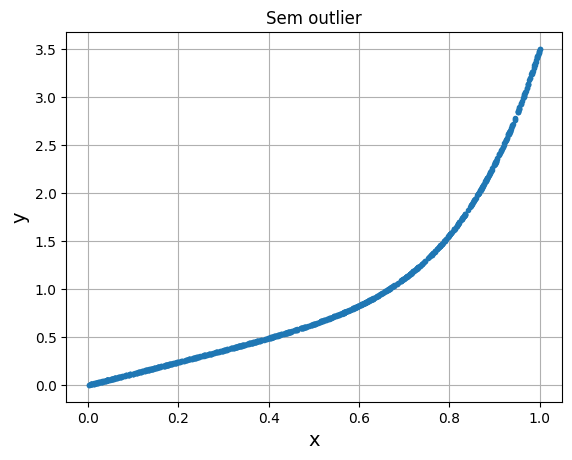

In [107]:
plt.plot(x, y, '.')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title('Sem outlier')
plt.grid()
plt.show()

### Approximating with an order six polynomial.

**OBS**.:

+ A classe `PolynomialFeatures` gera a matriz de atributos que consiste de todas as combinações entre os atributos.
+ A classe `Pipeline` cria uma sequência (*pipe*) de ações que são aplicadas aos dados. Neste caso, temos transformações (criação da matriz de atributos e padronização) e a regressão linear.

In [108]:
# Instantiate a polynomial.
# Generate a new feature matrix consisting of all polynomial combinations
# of the features.
poly = PolynomialFeatures(degree=6, include_bias=False)
# Instantiate a scaler.
scaler = StandardScaler()
# Instantiate a linear regressor.
reg = LinearRegression()

# Create a pipeline of actions.
# builds a composite estimator, as a chain of transforms and estimators.
poly_reg = Pipeline([
    ("poly", poly),
    ("scaler", scaler),
    ("reg", reg),
])

# Perform polynomial regression.
poly_reg.fit(x, y)

# Use the trained model for prediction of the training set.
y_pred = poly_reg.predict(x)

# Calculate the MSE.
mse = mean_squared_error(y, y_pred)
print('MSE:', mse)

MSE: 7.322372815923542e-31


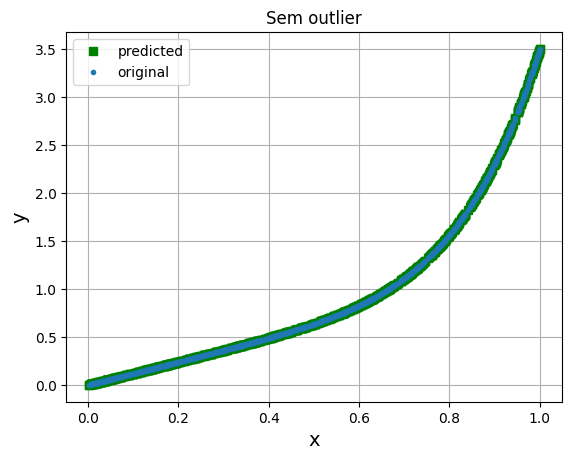

In [109]:
plt.plot(x, y_pred, 'gs', label='predicted')
plt.plot(x, y, '.', label='original')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title('Sem outlier')
plt.legend()
plt.grid()
plt.show()

### Dataset with outliers

Vamos adicionar um único valor discrepante igual a 1000.

In [110]:
M = 1

for i in range(0,M):
    x = np.append(x, np.random.rand())
    y = np.append(y, 1000)

x = x.reshape(len(y), 1)
y = y.reshape(len(y), 1)

print('New data set has: '+ str(len(y)) + " elements")

New data set has: 1001 elements


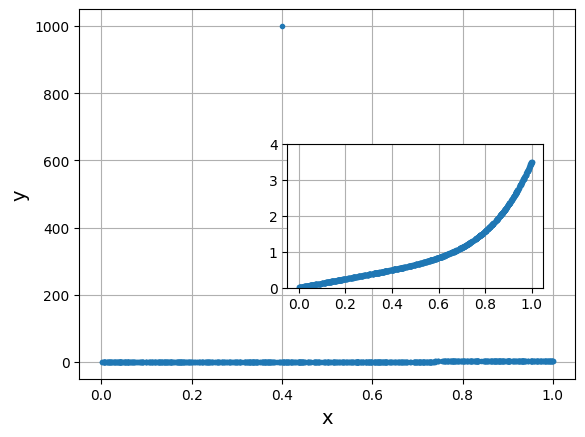

In [111]:
fig = plt.figure()
plt.plot(x, y, '.')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.grid()

left, bottom, width, height = [0.45, 0.3, 0.4, 0.3]
ax = fig.add_axes([left, bottom, width, height])
plt.plot(x, y, '.')
ax.set_ylim(0, 4.0)
ax.grid()

plt.show()

### Approximating with an order six polynomial.

In [112]:
# Instantiate a polynomial.
poly = PolynomialFeatures(degree=6, include_bias=False)
# Instantiate a scaler.
scaler = StandardScaler()
# Instantiate a linear regressor.
reg = LinearRegression()

# Create a pipeline of actions.
poly_reg = Pipeline([
    ("poly", poly),
    ("scaler", scaler),
    ("reg", reg),
])

# Perform polynomial regression.
poly_reg.fit(x, y)

# Use the trained model for prediction of the training set.
y_pred = poly_reg.predict(x)

print('MSE:', mean_squared_error(y, y_pred))

MSE: 993.622771878437


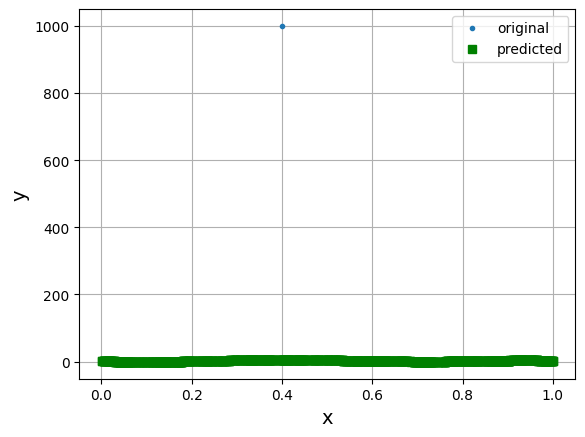

In [113]:
plt.plot(x, y, '.', label='original')
plt.plot(x, y_pred, 'gs', label='predicted')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend()
plt.grid()
plt.show()

### Zooming in

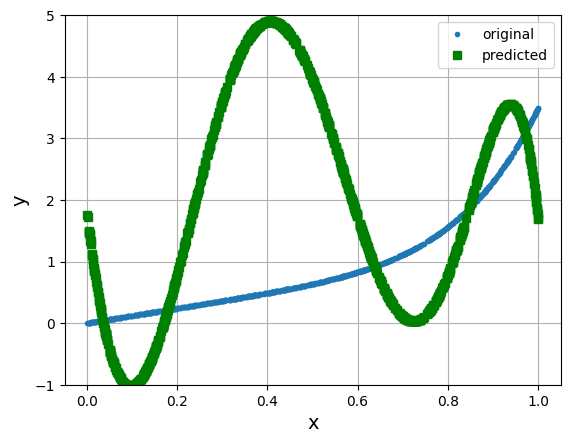

In [114]:
plt.plot(x, y, '.', label='original')
plt.plot(x, y_pred, 'gs', label='predicted')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend()
plt.ylim([-1,5])
plt.grid()
plt.show()

### Conclusões

+ Uma única amostra discrepante perturba o modelo obtido, ou seja, afeta o treinamento do modelo, fazendo com seu desempenho fique comprometido.